<a href="https://colab.research.google.com/github/DEEPAK-RAMGIRI/NLP-Natural-Language-Processor-/blob/main/Extra_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing necessary librarys to run the programme
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#it will show my drive details
!ls /content/drive/MyDrive

 01_2203A51216_Deepak_kumar_Expt-2.pdf	 coursera.png
 2203A51216_Assignment.pdf		'IInd yr_ Students_Participation_Certificates.pdf'
'batch 08.pdf'				 insurance_data.csv
 Classroom				 Picsart_23-09-13_18-23-50-040.jpg
'Colab Notebooks'			'SOFTWARE ENGINEERING STARUML.pdf'
'Coursera Certificate.pdf'


In [6]:
file_path = '/content/drive/MyDrive/insurance_data.csv'
df = pd.read_csv(file_path)

In [7]:
#Printing the top 5 head values
df.head(5)

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [15]:
#printing the bottom 5 values
df.tail(5)

,age,affordibility,bought_insurance
23,45,1,1
24,50,1,1
25,54,1,1
26,23,1,0
27,46,1,0


In [11]:
#importing the train and test split data to train and test our data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=25)

In [12]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age']/100

In [8]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model and capture the history
history = model.fit(X_train_scaled, y_train, epochs=5000, verbose=0)

# Plot the training loss and accuracy curves
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

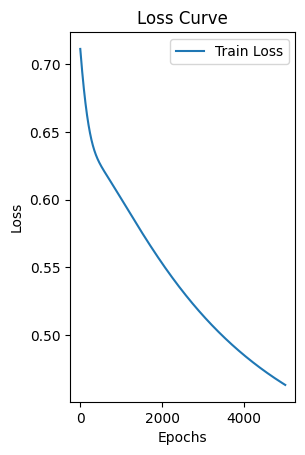

In [14]:
# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

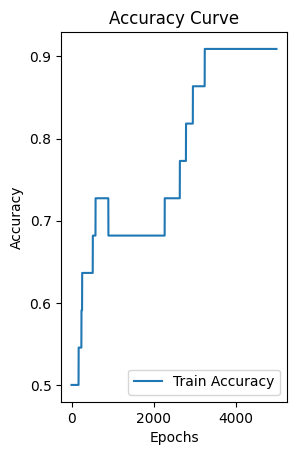

In [15]:
# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
model.evaluate(X_test_scaled,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 1.0000 - loss: 0.3550


[0.3549776077270508, 1.0]

In [17]:
X_test_scaled

,age,affordibility
2,0.47,1
10,0.18,1
21,0.26,0
11,0.28,1
14,0.49,1
9,0.61,1


In [18]:
model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[0.7054848 ],
       [0.3556957 ],
       [0.16827835],
       [0.4780119 ],
       [0.7260696 ],
       [0.82949823]], dtype=float32)

In [19]:
coef, intercept = model.get_weights()

In [20]:
coef, intercept

(array([[5.060863 ],
        [1.4086518]], dtype=float32),
 array([-2.9137027], dtype=float32))